# Продолжаем проверять гипотезы


В этом домашнем задании нужно снова проверить много гипотез

Каждая задание дает 5 баллов

| Задание            | Датасет         | Баллы |
|--------------------|-----------------|-------|
| Однородная игра    | killer_time     |     5 |
| Мыши и зеркало     | mouses_mirror   |     5 |
| Энергетик          | energy drink    |     5 |
| Бомбардировки      | london          |     5 |
| Анорексия          | anorexia        |     5 |
| Метилфенидат       | methylphenidate |     5 |
| Сиэтл              | seattle         |     5 |
| Расход топлива - 1 | mtcars: vs mpg  |     5 |
| Расход топлива - 2 | mtcars: am mpg  |     5 |
| Расход топлива - 3 | mtcars: am vs   |     5 |
|                    | Всего           |    50 |

In [218]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Latex

plt.style.use('ggplot')

In [219]:
# это на всякий случай для маков, чтобы скачался датасет
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# тут лежат все датасеты
ROOT = 'https://raw.githubusercontent.com/ilyaaaaaaaa/datasets_for_ds/main/data/'
# ROOT = '../data/'


In [220]:
import scipy
print(scipy.__version__)

1.6.2


## Однородная игра

Киллер - это весёлая лагерная игра. Краткие правила игры:

- Игроки пишут свои имена на карточках и кладут их в шляпу
- Игроки рандомно вытаскивают карточки из шляпы 
- Полученное имя - имя жертвы
- Каждый игрок одновременно и убийца и жертва
- Чтобы убить другого игрока, надо оказаться с ним наедине и застрелить из пальца
- Жертва убитого становится новой жертвой игрока
- Побеждает тот, кто совершит наибольшее число убийств

На экономическом факультете было два раунда игры в киллера. Все убийства регистрировались в гугл-форме. В табличках `killer_time1.csv` и `killer_time2.csv` лежит время в часах, которое проходило между убийствами.

In [221]:
killer1 = pd.read_csv(ROOT+"killer_time1.csv").hours_between_kill.values
killer2 = pd.read_csv(ROOT+"killer_time2.csv").hours_between_kill.values

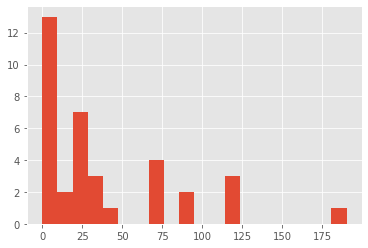

In [222]:
plt.hist(killer1, bins=20);

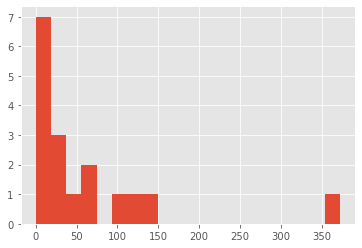

In [223]:
plt.hist(killer2, bins=20);

Распределение выглядит, как экспоненциальное. Более того, по гистограммам возникает ощущение, что это одинаковое распределение. С помощью теста Колмогорова-Смирнова проверьте гипотезу о том, что обе выборки пришли из одного и того же распределения, $p$-значение, полученное при проверке запишите в переменную `pvalue1`. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 0.55
Нулевая гипотеза не отвергается на уровне значимости 0.05


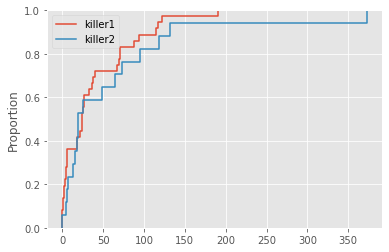

In [224]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

sns.ecdfplot(killer1, label='killer1')
sns.ecdfplot(killer2, label='killer2')
plt.legend();

pvalue1 = sts.ks_2samp(killer1, killer2)[1]
alpha = 0.05

display(Latex('$H_0: \hspace{2mm} F_X(x) = F_Y(x)$'))
display(Latex('$H_1: \hspace{2mm} F_X(x) \\neq F_Y(x)$'))
print(f'P-значение: {pvalue1:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue1 < alpha else 'не отвергается', alpha))

С помощью теста Колмогорова проверьте гипотезу о том, что время для первой игры имеет экспоненциальное распределение с параметром $\lambda = 0.026$, $p$-значение, полученное при проверке запишите в переменную `pvalue2`. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 0.057
Нулевая гипотеза не отвергается на уровне значимости 0.05


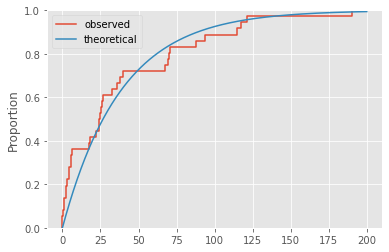

In [225]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

lam = 0.026

sns.ecdfplot(killer1, label='observed')
xs = np.arange(0, 200, 0.1)
cdf = sts.expon.cdf(xs, scale=1/lam)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

pvalue2 = sts.kstest(killer1, 'expon', args=(0, 1/lam))[1]
alpha = 0.05

display(Latex('$H_0: \hspace{2mm} F_X(x) \sim Exp(0.026)$'))
display(Latex('$H_1: \hspace{2mm} F_X(x) \\nsim Exp(0.026)$'))
print(f'P-значение: {pvalue2:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue2 < alpha else 'не отвергается', alpha))

In [226]:
# проверка того, что задание решено верно
assert pvalue1 > 0.5


## Мыши и зеркало

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом. 

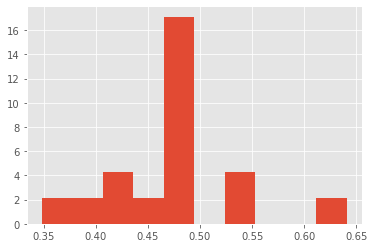

In [227]:
x = pd.read_csv(ROOT+'mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение. 

In [228]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

from statsmodels.stats.descriptivestats import sign_test

med0 = 0.5

pvalue_1 = sign_test(x, mu0=med0)[1]

alpha = 0.05

display(Latex('$H_0: \hspace{2mm} Med(x) = 0.5$'))
display(Latex('$H_1: \hspace{2mm} Med(x) \\neq 0.5$'))
print(f'P-значение: {pvalue_1:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue_1 < alpha else 'не отвергается', alpha))
print()
print('Критерий знаков учитывает только знак отклонения, поэтому часть информации теряется.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 0.021
Нулевая гипотеза отвергается на уровне значимости 0.05

Критерий знаков учитывает только знак отклонения, поэтому часть информации теряется.


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение. 

In [229]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

pvalue_2 = sts.wilcoxon(x - med0)[1]

display(Latex('$H_0: \hspace{2mm} Med(x) = 0.5$'))
display(Latex('$H_1: \hspace{2mm} Med(x) \\neq 0.5$'))
print(f'P-значение: {pvalue_2:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue_2 < alpha else 'не отвергается', alpha))
print()
print('Критерий Уилкоксона использует ранги наблюдений, поэтому позволяет сохранить \
больше информации, чем критерий знаков.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 0.093
Нулевая гипотеза не отвергается на уровне значимости 0.05

Критерий Уилкоксона использует ранги наблюдений, поэтому позволяет сохранить больше информации, чем критерий знаков.


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение. 

In [230]:
from statsmodels.stats.weightstats import ztest,zconfint

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

pvalue_3 = ztest(x, value=0.5)[1]

display(Latex('$H_0: \hspace{2mm} \mu_x = 0.5$'))
display(Latex('$H_1: \hspace{2mm} \mu_x \\neq 0.5$'))
print(f'P-значение: {pvalue_3:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue_3 < alpha else 'не отвергается', alpha))
print()
print('Асимптотический z-тест основывается на ЦПТ и предполагает большое число наблюдений.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 0.13
Нулевая гипотеза не отвергается на уровне значимости 0.05

Асимптотический z-тест основывается на ЦПТ и предполагает большое число наблюдений.


In [231]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05


Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

- Критерий знаков показал, что большинство мышек провели больше времени в комнате без зеркала. Поэтому нулевая
гипотеза о равенстве предпочтений была отвергнута.
- Критерий Уилкоксона, с другой стороны, учёл ранги отклонений, вследствие чего мы не отвергли нулевую гипотезу.
- Z-тест учёл уже не ранги, а выборочную дисперсию, что дало ещё более высокое pvalue 
и не позволило отвергнуть нулевую гипотезу.
Однако значение 0.5 находится на самой границе 95% доверительного интервала, что возвращает нас к результату критерия знаков:
выборочная средняя довольно сильно отличается от 0.5.

In [232]:
zconfint(x)

(0.44291783217355185, 0.5076599553264481)

## Энергетик

Исследовательница Глафира считает, что любовь к энергетическим напиткам и успешность сдачи экзамена по математической статистике должны быть как-то связаны. Опросив $200$ своих однокурсников, она получила следующие результаты:

- Сдал, пьёт энергетик: 20
- Сдал, не пьёт энергетик: 120
- Завалил, пьёт энергетик: 40
- Завалил, не пьёт энергетик: 20

Правда ли, что энергетик оказывает на успешность сдачи экзамена какое-то влияние? Проверьте гипотезу с помощью критерия Пирсона. В качестве ответа запишите в переменную `pvalue` получившееся $p$-значение.

In [233]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

from scipy.stats import chi2_contingency

df = pd.DataFrame([[20, 40],[120, 20]])
df.columns = ["Pass","Fail"]
df.index = ["Energy Drink: YES", "Energy Drink: NO"]
print(df)

pvalue = chi2_contingency(df.values)[1]

display(Latex('$H_0: \hspace{2mm} \\text{X и Y независимы}$'))
display(Latex('$H_1: \hspace{2mm} \\text{X и Y зависимы}$'))
print(f'P-значение: {pvalue:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pvalue < alpha else 'не отвергается', alpha))

                   Pass  Fail
Energy Drink: YES    20    40
Energy Drink: NO    120    20


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

P-значение: 4.5e-13
Нулевая гипотеза отвергается на уровне значимости 0.05


In [234]:
# проверка того, что задание решено верно
assert pvalue < 0.05


## Бомбардировки

В таблице `london_07-09-1940.tsv` лежат данные о бомбардировке Лондона 7 сентября 1940 года немецкой авиацией. Интересно выяснить, насколько прицельно велась бомбардировка. Если немецкие войска знали, где именно находятся британские военные объекты, они вели бы бомбардировку пристрельно.  

Ещё больше данных о бомбардировке Лондона ищите здесь: http://bombsight.org/data/sources/

In [235]:
df = pd.read_csv(ROOT+'london_07-09-1940.tsv', sep='\t')
print(df.shape)
df.head()

(751, 6)


,Time,Location,Type_of_bomb,Damage,x,y
0,0:08,"43 Southwark Park Road, SE16, London, UK",IB,Grocers: 3x2 roof damaged,-0.127660,51.507351
1,0:10,"49 Southwark Park road, Bermondsey, SE16, Lond...",IB,Bakers: 3x2 roof damaged,-0.054303,51.487794
2,0:15,"84 Southwark Park Road, SE16, London, UK",IB,front room on 1st floor and contents slightly ...,-0.127660,51.507351
3,0:18,"141 Braidwood Road, Catford SE6, London, UK",IB,10x6 roof damage,-0.025584,51.443299
4,0:20,"129 Killearn Road, Catford SE6, London, UK",IB,Front room on 1st floor severely damaged,-0.025584,51.443299


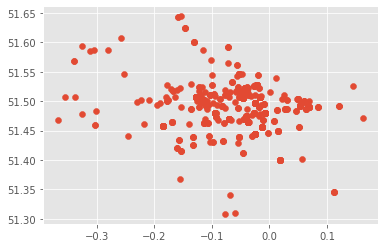

In [236]:
plt.scatter(df.x, df.y);

В колонках $x$ и $y$ лежат координаты точки, куда упала бомба. Разбейте Лондон решёткой размера $30 \times 30$ на $900$ небольших квадратных участков. С помощью функции `binned_statistic_2d` из пакета `scipy.stats`, подсчитайте как часто снаряд попадал на какой из участков. Поместите информацию об этом в переменную `ret`. 

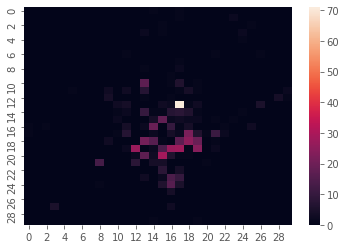

In [237]:
binx = np.linspace(df.x.min(), df.x.max(), 31)
biny = np.linspace(df.y.min(), df.y.max(), 31)

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

from scipy.stats import binned_statistic_2d

ret = binned_statistic_2d(df.x, df.y, None, 'count', bins=[binx, biny])

sns.heatmap(ret.statistic);

Распакуйте информацию о попаданиях в участки в вектор `z`. Нарисуте гистограмму для получившегося распределения. 

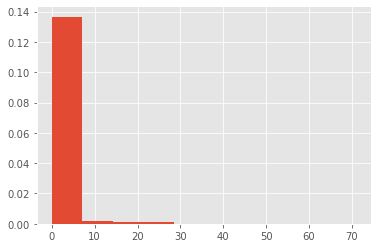

In [238]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

z = ret.statistic.flatten()
plt.hist(z, density=True);

Участков много, а вероятность попадания на отдельный участок мала. При справедливости гипотезы о низкой точности стрельбы мы можем воспользоваться законом редких событий:

> Если в схеме испытаний Бернулли $p \to 0$, а $n \to \infty$, оно сходится к распределению Пуассона. 

Получается, что __при верности гипотезы о низкой точности стрельбы,__ число попаданий в квадрат имеет распределение Пуассона. Дополнительно будем предполагать, что попадания на разные участки независимы друг от друга. 

C помощью критерия Пирсона проверьте гипотезу о том, что число попаданий на участок имеет распределение Пуассона. Прежде, чем вычислять статистику, объедините все наблюдения из хвоста в одно по аналогии с лекцией. Хвостом будем считать все наблюдения $\ge 9$. Получившуюся в результате расчётов статистику запишите в переменную `T`.

In [239]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

c = np.array(['9+' if i >= 9 else i for i in z])

obs = {}
for i in range(len(c)):
    if c[i] in obs:
        obs[c[i]] += 1
    else:
        obs[c[i]] = 1        
obs_q = np.array(list(obs.values()))

exp = {}
for i in obs:
    if i != '9+':
        exp[i] = sts.poisson(z.mean()).pmf(float(i))
    else:
        exp[i] = 1 - sts.poisson(z.mean()).cdf(8)
exp_p = np.array(list(exp.values()))

n = len(z)

T = np.sum((obs_q - n*exp_p)**2 / (n*exp_p))

alpha = 0.05
df = len(obs) - 1 - 1
chi2_crit = sts.chi2.ppf(1-alpha,df)
P = 1 - sts.chi2.cdf(T, df)

display(Latex('$H_0: \hspace{2mm} X \sim Poiss(\lambda)$'))
display(Latex('$H_1: \hspace{2mm} X \\nsim Poiss(\lambda)$'))
print(f'T: {T:.8}')
print(f'Критическое значение: {chi2_crit:.3}')
print(f'P-значение: {P}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

T: 2506879.8
Критическое значение: 15.5
P-значение: 0.0
Нулевая гипотеза отвергается на уровне значимости 0.05


In [240]:
# проверка того, что задание решено верно
assert T > 6000


Какой вывод мы можем из этого сделать? Правда ли, что бомбардировка осуществлялась прицельно? 

Гипотеза о принадлежности координат обстрела распределению Пуассона отвергается. Следовательно, отвергается гипотеза о низкой точности стрельбы. Это позволяет предположить, что обстрел вёлся прицельно.

# Еще больше гипотез

- Ниже приведены несколько датасетов, их необходимо самостоятельно проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее
    - Сделать хорошую визуализацию исследуемых переменных
    - Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
- Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
- Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Анорексия

В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?


In [241]:
df = pd.read_csv(ROOT+'anorexia.txt', sep='\t')
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


**Перед нами задача на разницу средней в связных выборках.**
- Подходящие непараметрические критерии:
    - критерий знаков,
    - критерий Уилкоксона;
- Подходящие параметрические критерии:
    - критерий Стьюдента на разницу средних в зависимых выборках, в случае нормального распределения;
- Подходящие критерии согласия:
    - критерий Колмогорова, так как проверяется гипотеза о происхождении выборки из непрерывного распределения.

In [242]:
d = df.After - df.Before
d.describe()

count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
dtype: float64

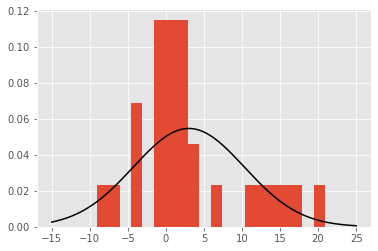

In [243]:
mean = d.mean()
std = d.std(ddof=1)
n = d.count()
alpha = 0.05

plt.hist(d, bins=20, density=True)

xs = np.linspace(-15, 25, 300)
ys = sts.norm(loc=mean, scale=std).pdf(xs)
plt.plot(xs, ys, color="black");

Из графика можно сделать предположения:
- разница средних равна нулю;
- распределение ненормальное.

Проверим это тестами.

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий знаков

$H_0\colon P(X > Y) = 0.5$

$H_1\colon P(X > Y) \ne 0.5$

In [244]:
from statsmodels.stats.descriptivestats import sign_test

x = df.After
y = df.Before

T, P = sign_test(x, y)
T_crit = sts.binom(n, 0.5).ppf(1 - alpha/2)

print(f'T: {T:.3}')
print(f'Критическое значение: {T_crit:.3}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 3.5
Критическое значение: 20.0
P-значение: 0.26
Нулевая гипотеза не отвергается на уровне значимости 0.05


### Критерий Уилкоксона

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [245]:
T, P = sts.wilcoxon(x, y)
T_crit = sts.norm(0, np.sqrt((n * (n + 1) * (2*n + 1)) / 6)).ppf(1 - alpha/2)

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.7}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 131.5
Критическое значение: 181.2834
P-значение: 0.063
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Непараметрические тесты опровергают гипотезу об эффективности терапии анорексии.
Проведём тест Колмогорова для использования параметрического критерия.**

### КРИТЕРИИ СОГЛАСИЯ

### Q-Q-График

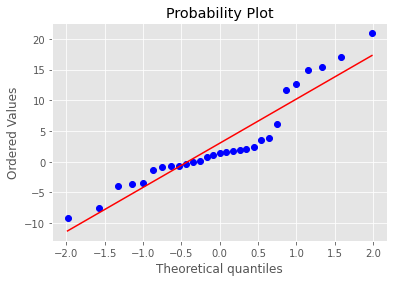

In [246]:
sts.probplot(d, dist="norm", plot=plt);

Q-Q-График показывает, что распределение похоже на нормальное.

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

P-значение: 0.096
Нулевая гипотеза не отвергается на уровне значимости 0.05


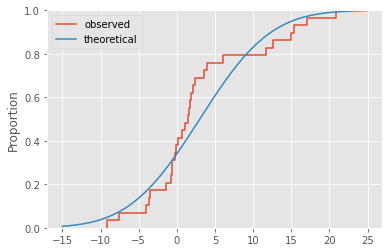

In [247]:
sns.ecdfplot(d, label='observed')
xs = np.arange(-15, 25, 0.1)
cdf = sts.norm.cdf(xs, loc=mean, scale=std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(d, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

**Критерий Колмогорова не отвергает гипотезу о происхождении выборки из нормального распределения.**

### ПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Стьюдента
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_1-\mu_2  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [248]:
T, P = sts.ttest_rel(x, y)
T_crit = sts.t(n - 1).ppf(1 - alpha/2)

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 2.216
Критическое значение: 2.048
P-значение: 0.035
Нулевая гипотеза отвергается на уровне значимости 0.05


**Параметрический критерий Стьюдента опровергает гипотезу о неэффективности терапии анорексии на уровне значимости 0.05.
Однако уже на уровне < 0.035 нулевая гипотеза опровергаться, исходя из имеющихся данных, не будет.**

**На поставленный вопрос, исходя из результатов 3 тестов, я бы ответил, что терапия анорексии эффективной не была.**

## Метилфенидат
В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.



In [249]:
df = pd.read_csv(ROOT+'methylphenidate.txt', sep=' ')
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


**Перед нами задача на разницу средней в связных выборках.**
- Подходящие непараметрические критерии:
    - критерий знаков,
    - критерий Уилкоксона;
- Подходящие параметрические критерии:
    - критерий Стьюдента на разницу средних в зависимых выборках, в случае нормального распределения;
- Подходящие критерии согласия:
    - критерий Колмогорова, так как проверяется гипотеза о происхождении выборки из непрерывного распределения.

In [250]:
d = df.Methylphenidate - df.Placebo
d.describe()

count    24.000000
mean      4.958333
std       7.538188
min     -11.000000
25%      -1.250000
50%       5.000000
75%       8.500000
max      22.000000
dtype: float64

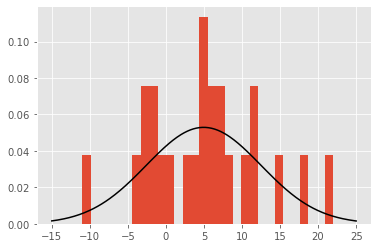

In [251]:
mean = d.mean()
std = d.std(ddof=1)
n = d.count()
alpha = 0.05

plt.hist(d, bins=30, density=True)

xs = np.linspace(-15, 25, 300)
ys = sts.norm(loc=mean, scale=std).pdf(xs)
plt.plot(xs, ys, color="black");

Из графика можно сделать предположения:
- разница средних не равна нулю;
- распределение ненормальное.

Проверим это тестами.

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий знаков

$H_0\colon P(X > Y) = 0.5$

$H_1\colon P(X > Y) \ne 0.5$

In [252]:
from statsmodels.stats.descriptivestats import sign_test

x = df.Methylphenidate
y = df.Placebo

T, P = sign_test(x, y)
T_crit = sts.binom(n, 0.5).ppf(1 - alpha/2)

print(f'T: {T:.3}')
print(f'Критическое значение: {T_crit:.3}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 5.0
Критическое значение: 17.0
P-значение: 0.064
Нулевая гипотеза не отвергается на уровне значимости 0.05


### Критерий Уилкоксона

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [253]:
T, P = sts.wilcoxon(x, y)
T_crit = sts.norm(0, np.sqrt((n * (n + 1) * (2*n + 1)) / 6)).ppf(1 - alpha/2)

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.7}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 48.5
Критическое значение: 137.1975
P-значение: 0.0028
Нулевая гипотеза отвергается на уровне значимости 0.05


**Критерий знаков опровергают гипотезу об эффективности препарата. Однако критерий Уилкоксона, который собирает больше
информации из выборки, гипотезу об эффективности не опровергает.**

### КРИТЕРИИ СОГЛАСИЯ

### Q-Q-График

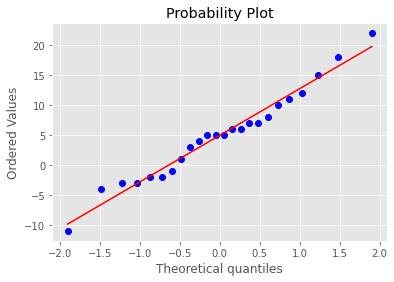

In [254]:
sts.probplot(d, dist="norm", plot=plt);

Q-Q-График показывает, что распределение похоже на нормальное.

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

P-значение: 0.94
Нулевая гипотеза не отвергается на уровне значимости 0.05


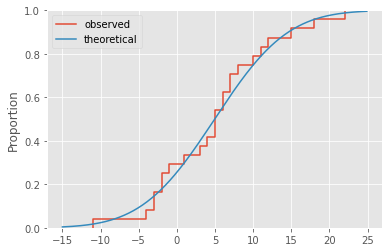

In [255]:
sns.ecdfplot(d, label='observed')
xs = np.arange(-15, 25, 0.1)
cdf = sts.norm.cdf(xs, loc=mean, scale=std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(d, 'norm', args=(mean, std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

**Критерий Колмогорова не отвергает гипотезу о происхождении выборки из нормального распределения.**

### ПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Стьюдента
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_1-\mu_2  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [256]:
T, P = sts.ttest_rel(x, y)
T_crit = sts.t(n - 1).ppf(1 - alpha/2)

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 3.222
Критическое значение: 2.069
P-значение: 0.0038
Нулевая гипотеза отвергается на уровне значимости 0.05


**Параметрический критерий Стьюдента опровергает гипотезу о неэффективности терапии анорексии на уровне значимости 0.05 и даже на гораздно более низких уровнях.**

**На поставленный вопрос, исходя из результатов 3 тестов, я бы ответил, что Метилфенидат эффективен при условии корректности исследования.**

## Сиэтл
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [257]:
df = pd.read_csv(ROOT+'seattle.txt', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


**Перед нами задача на разницу средней в независимых выборках.**
- Подходящие непараметрические критерии:
    - критерий Манна-Уитни, при условии похожести распределения выборок;
- Подходящие параметрические критерии:
    - Асимптотические:
        - z-критерий на разницу средних;
    - Точные (при условии нормального распределения):
        - t-критерий в случае равных дисперсий или t-критерий Уэлча в случае разных дисперсий;
- Подходящие критерии согласия:
    - критерий Колмогорова, так как проверяется гипотеза о происхождении выборок из непрерывного распределения;
- Дополнительные тесты:
    - критерий Фишера на отношение дисперсий (в случае нормальных выборок для определения нужного t-теста).

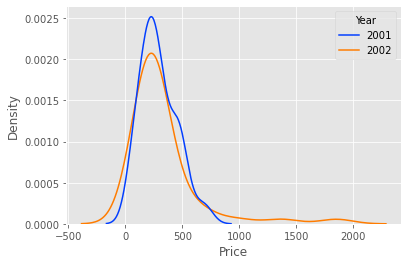

In [258]:
sns.kdeplot(data=df,
             x='Price', hue='Year', 
             common_norm=False, palette='bright'
            );

**Выводы из графика:**
- Распределения похожи --> можно использовать тест Манна-Уитни;
- Распределения куполообразны --> вероятно, нормальные распределения;
- Средние на одном уровне, так что скорее всего гипотеза о равенстве средних отвергнута не будет, хотя у цен за 2022 год, очевидно, более сильная дисперсия (к слову о тесте Фишера) и очень тяжёлый правый хвост.

In [295]:
x = df[df.Year == 2002]['Price'].reset_index(drop=True)
y = df[df.Year == 2001]['Price'].reset_index(drop=True)
n = x.count()
x_mean, y_mean = x.mean(), y.mean()
x_std, y_std = x.std(ddof=1), y.std(ddof=1)
alpha = 0.05

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Манна-Уитни

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [311]:
T, P = sts.mannwhitneyu(x, y, alternative='greater')

print(f'T: {T:.5}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 1204.5
P-значение: 0.62
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Критерий Манна-Уитни опровергает гипотезу об изменении средних цен на недвижимость.**

### КРИТЕРИИ СОГЛАСИЯ

### Q-Q-График

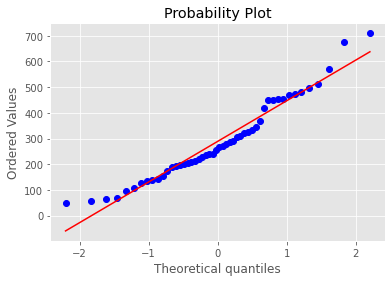

In [303]:
sts.probplot(y, dist="norm", plot=plt);

Q-Q-График цен 2021 года показывает, что распределение в целом похоже на нормальное.

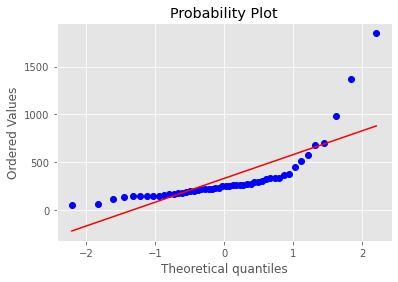

In [304]:
sts.probplot(x, dist="norm", plot=plt);

Q-Q-График цен 2022 года показывает, что правый хвост распределения гораздо тяжелее, чем у нормального.

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : Y \sim N(\mu, \sigma^2) \\
H_1 : Y \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [ ]:
y.describe()

P-значение: 0.64
Нулевая гипотеза не отвергается на уровне значимости 0.05


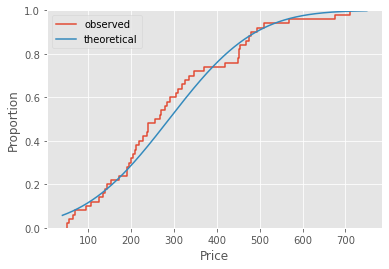

In [308]:
sns.ecdfplot(y, label='observed')
xs = np.arange(40, 750, 0.1)
cdf = sts.norm.cdf(xs, loc=y_mean, scale=y_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(y, 'norm', args=(y_mean, y_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [ ]:
x.describe()

P-значение: 0.00027
Нулевая гипотеза отвергается на уровне значимости 0.05


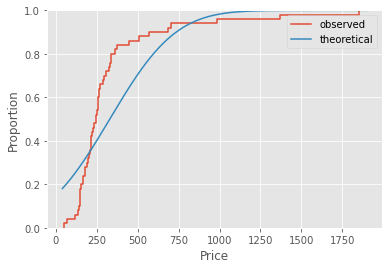

In [315]:
sns.ecdfplot(x, label='observed')
xs = np.arange(40, 1900, 0.1)
cdf = sts.norm.cdf(xs, loc=x_mean, scale=x_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(x, 'norm', args=(x_mean, x_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

**Критерий Колмогорова отвергает гипотезу о нормальности распределения одной из выборок, поэтому воспользуемся только
асимптотическим критерием.**

### Z-тест на разность средних
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x-\mu_y = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_x-\mu_y  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [317]:
d_mean = x_mean - y_mean                                
d_std = np.sqrt(x.var(ddof=1)/n + y.var(ddof=1)/n)   

T = d_mean/d_std                                           
T_crit = sts.norm.ppf(1 - alpha/2)
P = (1 - sts.norm.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 0.8057
Критическое значение: 1.96
P-значение: 0.42
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Параметрический z-тест опровергает гипотезу об изменении средних цен на недвижимость на уровне значимости 0.05.**

**На поставленный вопрос, исходя из результатов 2 тестов, я бы ответил, что средние цены на недвижимость не изменились.**

## Расход топлива
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон); 
2. cyl — количество цилиндров мотора; 3) disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 11) carb — количество карбюраторов.



- Влияет ли тип двигателя на расход топлива? 
- А тип коробки передач?
- Взаимосвязаны ли тип двигателя и тип коробки передач?

In [318]:
df = pd.read_csv(ROOT+'mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [321]:
df.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [319]:
cols = ['mpg', 'vs', 'am']
corr = df[cols].corr()

corr

,mpg,vs,am
mpg,1.000000,0.664039,0.599832
vs,0.664039,1.000000,0.168345
am,0.599832,0.168345,1.000000


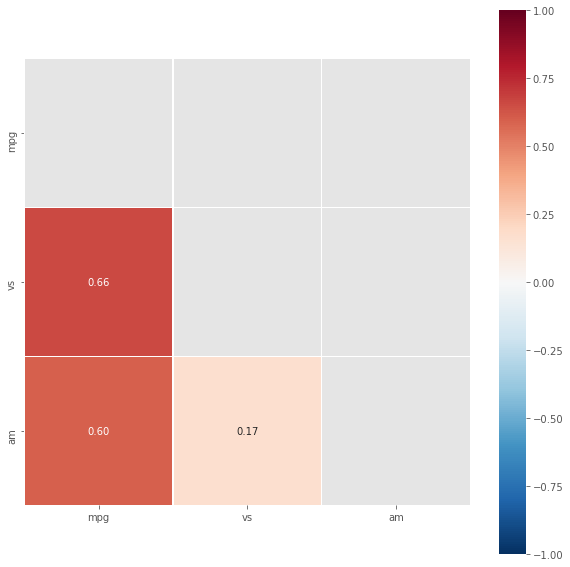

In [320]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, square=True,
            annot=True, fmt=".2f", 
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

**Исходя из проведённого корреляционного анализа, расход тполива довольно сильно зависит и от типа двигателя, и от типа коробки передач. А вот тип двигателя и тип коробки передач связаны между собой слабо.**

#### Попарный анализ
Так как тип двигателя и тип коробки передач - булевы переменные, мы можем разбить по этим критериям автомобили на 2 выборки и провести сравнение средних и долей.

### vs, mpg

**Перед нами задача на разницу средней в независимых выборках.**
- Подходящие непараметрические критерии:
    - критерий Манна-Уитни, при условии похожести распределения выборок;
- Подходящие параметрические критерии:
    - Асимптотические:
        - z-критерий на разницу средних;
    - Точные (при условии нормального распределения):
        - t-критерий в случае равных дисперсий или t-критерий Уэлча в случае разных дисперсий;
- Подходящие критерии согласия:
    - критерий Колмогорова, так как проверяется гипотеза о происхождении выборок из непрерывного распределения;
- Дополнительные тесты:
    - критерий Фишера на отношение дисперсий (в случае нормальных выборок для определения нужного t-теста).

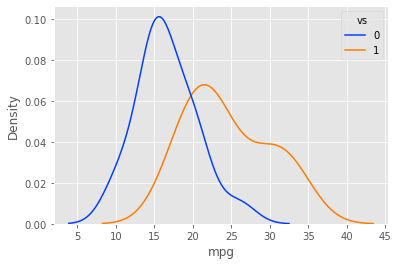

In [324]:
sns.kdeplot(data=df,
             x='mpg', hue='vs', 
             common_norm=False, palette='bright'
            );

**Выводы из графика:**
- Распределения похожи --> можно использовать тест Манна-Уитни;
- Распределения куполообразны --> вероятно, нормальные распределения;
- Средние на разных уровнях, так что скорее всего гипотеза о равенстве средних будет отвергнута;
- Дисперсии скорее всего различаются.

In [328]:
x = df[df.vs == 1]['mpg'].reset_index(drop=True)
y = df[df.vs == 0]['mpg'].reset_index(drop=True)
x_n, y_n = x.count(), y.count()
x_mean, y_mean = x.mean(), y.mean()
x_std, y_std = x.std(ddof=1), y.std(ddof=1)
alpha = 0.05

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Манна-Уитни

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [335]:
T, P = sts.mannwhitneyu(x, y, alternative='greater')

print(f'T: {T:.5}')
print(f'P-значение: {P:.5}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 229.5
P-значение: 4.5172e-05
Нулевая гипотеза отвергается на уровне значимости 0.05


**Критерий Манна-Уитни опровергает гипотезу о равенстве среднего расхода топлива для разных типов двигателя.**

### КРИТЕРИИ СОГЛАСИЯ

### Q-Q-График

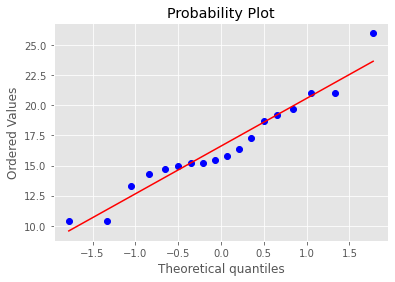

In [336]:
sts.probplot(y, dist="norm", plot=plt);

Q-Q-График расхода топлива для V-образных двигателей показывает, что распределение в целом похоже на нормальное.

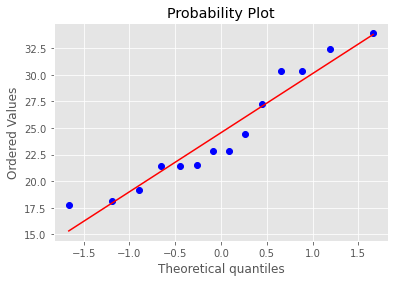

In [337]:
sts.probplot(x, dist="norm", plot=plt);

Q-Q-График расхода топлива для рядных двигателей показывает, что распределение в целом похоже на нормальное.

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : Y \sim N(\mu, \sigma^2) \\
H_1 : Y \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [338]:
y.describe()

count    18.000000
mean     16.616667
std       3.860699
min      10.400000
25%      14.775000
50%      15.650000
75%      19.075000
max      26.000000
Name: mpg, dtype: float64

P-значение: 0.83
Нулевая гипотеза не отвергается на уровне значимости 0.05


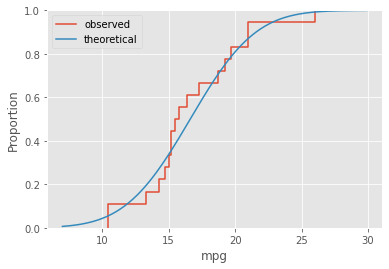

In [339]:
sns.ecdfplot(y, label='observed')
xs = np.arange(7, 30, 0.1)
cdf = sts.norm.cdf(xs, loc=y_mean, scale=y_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(y, 'norm', args=(y_mean, y_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [340]:
x.describe()

count    14.000000
mean     24.557143
std       5.378978
min      17.800000
25%      21.400000
50%      22.800000
75%      29.625000
max      33.900000
Name: mpg, dtype: float64

P-значение: 0.57
Нулевая гипотеза не отвергается на уровне значимости 0.05


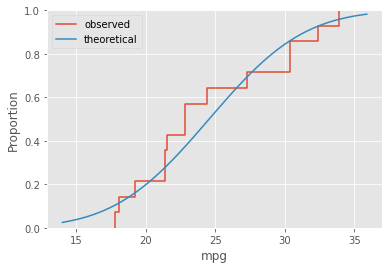

In [341]:
sns.ecdfplot(x, label='observed')
xs = np.arange(14, 36, 0.1)
cdf = sts.norm.cdf(xs, loc=x_mean, scale=x_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(x, 'norm', args=(x_mean, x_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

**Критерий Колмогорова не отвергает гипотезу о нормальности распределений, поэтому воспользуемся всеми параметрическими критериями.**

### ПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Z-тест на разность средних
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x-\mu_y = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_x-\mu_y  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [344]:
d_mean = x_mean - y_mean                                
d_std = np.sqrt(x.var(ddof=1)/n + y.var(ddof=1)/n)   

T = d_mean/d_std                                           
T_crit = sts.norm.ppf(1 - alpha/2)
P = (1 - sts.norm.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 4.487
Критическое значение: 1.96
P-значение: 7.2e-06
Нулевая гипотеза отвергается на уровне значимости 0.05


### Критерий Фишера
$$
\begin{aligned}
&H_0: \hspace{2mm} \sigma^2_x = \sigma^2_y \hspace{2mm} \\
&H_1: \hspace{2mm} \sigma^2_x \neq \sigma^2_y  \hspace{2mm}
\end{aligned}
$$

In [345]:
T = x.var()/y.var()
f = sts.f(x_n - 1, y_n - 1) 
T_crit = f.ppf(1 - alpha/2)
P = (1 - f.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 1.941
Критическое значение: 2.786
P-значение: 0.2
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Тест Фишера не отвергает гипотезу о равенстве дисперсий на уровне значимости 0.05.
Следовательно, выбираем t-тест на разницу средних для одинаковых дисперсий.**

### Тест Стьюдента на разность средних для одинаковых дисперсий
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x-\mu_y = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_x-\mu_y  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [347]:
d = x_mean - y_mean                               
d_var = ((x_n - 1)*x.var(ddof=1) + (y_n - 1)*y.var(ddof=1))/(x_n + y_n - 2)
d_std = np.sqrt(d_var/x_n + d_var/y_n)                  

T = d/d_std
t = sts.t(df = x_n + y_n - 2)
T_crit = t.ppf(1 - alpha/2)
P = (1 - t.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 4.864
Критическое значение: 2.042
P-значение: 3.4e-05
Нулевая гипотеза отвергается на уровне значимости 0.05


**На поставленный вопрос, исходя из результатов 2 тестов, я бы ответил, что средний расход топлива различается в зависимости от типа двигателя.**

### am, mpg

**Перед нами задача на разницу средней в независимых выборках.**
- Подходящие непараметрические критерии:
    - критерий Манна-Уитни, при условии похожести распределения выборок;
- Подходящие параметрические критерии:
    - Асимптотические:
        - z-критерий на разницу средних;
    - Точные (при условии нормального распределения):
        - t-критерий в случае равных дисперсий или t-критерий Уэлча в случае разных дисперсий;
- Подходящие критерии согласия:
    - критерий Колмогорова, так как проверяется гипотеза о происхождении выборок из непрерывного распределения;
- Дополнительные тесты:
    - критерий Фишера на отношение дисперсий (в случае нормальных выборок для определения нужного t-теста).

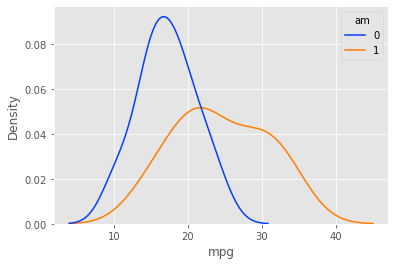

In [348]:
sns.kdeplot(data=df,
             x='mpg', hue='am', 
             common_norm=False, palette='bright'
            );

**Выводы из графика:**
- Распределения в целом похожи --> можно использовать тест Манна-Уитни;
- Распределения куполообразны --> вероятно, нормальные распределения;
- Средние на разных уровнях, так что скорее всего гипотеза о равенстве средних будет отвергнута;
- Дисперсии скорее всего различаются.

In [349]:
x = df[df.am == 1]['mpg'].reset_index(drop=True)
y = df[df.am == 0]['mpg'].reset_index(drop=True)
x_n, y_n = x.count(), y.count()
x_mean, y_mean = x.mean(), y.mean()
x_std, y_std = x.std(ddof=1), y.std(ddof=1)
alpha = 0.05

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Манна-Уитни

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [352]:
T, P = sts.mannwhitneyu(x, y, alternative='greater')

print(f'T: {T:.5}')
print(f'P-значение: {P:.3}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 205.0
P-значение: 0.000936
Нулевая гипотеза отвергается на уровне значимости 0.05


**Критерий Манна-Уитни опровергает гипотезу о равенстве среднего расхода топлива для разных типов коробки передач.**

### КРИТЕРИИ СОГЛАСИЯ

### Q-Q-График

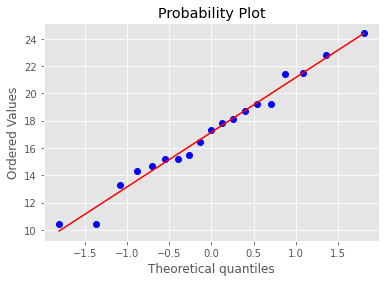

In [353]:
sts.probplot(y, dist="norm", plot=plt);

Q-Q-График расхода топлива для автоматической коробки передач показывает, что распределение в целом похоже на нормальное.

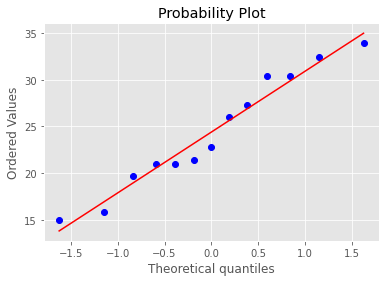

In [354]:
sts.probplot(x, dist="norm", plot=plt);

Q-Q-График расхода топлива для ручной коробки передач показывает, что распределение в целом похоже на нормальное.

### Критерий Колмогорова

$$
\begin{aligned}
H_0 : Y \sim N(\mu, \sigma^2) \\
H_1 : Y \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [355]:
y.describe()

count    19.000000
mean     17.147368
std       3.833966
min      10.400000
25%      14.950000
50%      17.300000
75%      19.200000
max      24.400000
Name: mpg, dtype: float64

P-значение: 1.0
Нулевая гипотеза не отвергается на уровне значимости 0.05


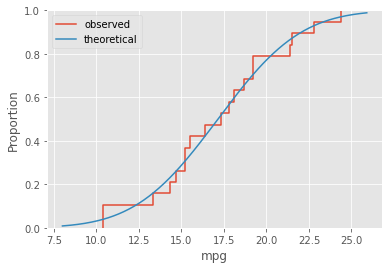

In [356]:
sns.ecdfplot(y, label='observed')
xs = np.arange(8, 26, 0.1)
cdf = sts.norm.cdf(xs, loc=y_mean, scale=y_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(y, 'norm', args=(y_mean, y_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

$$
\begin{aligned}
H_0 : X \sim N(\mu, \sigma^2) \\
H_1 : X \nsim N(\mu, \sigma^2)
\end{aligned}
$$

In [357]:
x.describe()

count    13.000000
mean     24.392308
std       6.166504
min      15.000000
25%      21.000000
50%      22.800000
75%      30.400000
max      33.900000
Name: mpg, dtype: float64

P-значение: 0.9
Нулевая гипотеза не отвергается на уровне значимости 0.05


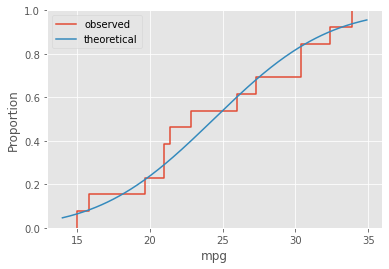

In [358]:
sns.ecdfplot(x, label='observed')
xs = np.arange(14, 35, 0.1)
cdf = sts.norm.cdf(xs, loc=x_mean, scale=x_std)
plt.plot(xs, cdf, label='theoretical')

plt.legend();

P = sts.kstest(x, 'norm', args=(x_mean, x_std))[1]

print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if P < alpha else 'не отвергается', alpha))

**Критерий Колмогорова не отвергает гипотезу о нормальности распределений, поэтому воспользуемся всеми параметрическими критериями.**

### ПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Z-тест на разность средних
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x-\mu_y = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_x-\mu_y  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [359]:
d_mean = x_mean - y_mean                                
d_std = np.sqrt(x.var(ddof=1)/n + y.var(ddof=1)/n)   

T = d_mean/d_std                                           
T_crit = sts.norm.ppf(1 - alpha/2)
P = (1 - sts.norm.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 3.733
Критическое значение: 1.96
P-значение: 0.00019
Нулевая гипотеза отвергается на уровне значимости 0.05


### Критерий Фишера
$$
\begin{aligned}
&H_0: \hspace{2mm} \sigma^2_x = \sigma^2_y \hspace{2mm} \\
&H_1: \hspace{2mm} \sigma^2_x \neq \sigma^2_y  \hspace{2mm}
\end{aligned}
$$

In [360]:
T = x.var()/y.var()
f = sts.f(x_n - 1, y_n - 1) 
T_crit = f.ppf(1 - alpha/2)
P = (1 - f.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 2.587
Критическое значение: 2.769
P-значение: 0.067
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Тест Фишера не отвергает гипотезу о равенстве дисперсий на уровне значимости 0.05.
Следовательно, выбираем t-тест на разницу средних для одинаковых дисперсий.**

### Тест Стьюдента на разность средних для одинаковых дисперсий
$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x-\mu_y = 0 \hspace{2mm}\\
&H_1: \hspace{2mm}\mu_x-\mu_y  \ne 0 \hspace{2mm}
\end{aligned}
$$

In [361]:
d = x_mean - y_mean                               
d_var = ((x_n - 1)*x.var(ddof=1) + (y_n - 1)*y.var(ddof=1))/(x_n + y_n - 2)
d_std = np.sqrt(d_var/x_n + d_var/y_n)                  

T = d/d_std
t = sts.t(df = x_n + y_n - 2)
T_crit = t.ppf(1 - alpha/2)
P = (1 - t.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 4.106
Критическое значение: 2.042
P-значение: 0.00029
Нулевая гипотеза отвергается на уровне значимости 0.05


**На поставленный вопрос, исходя из результатов 2 тестов, я бы ответил, что средний расход топлива различается в зависимости от типа коробки передач.**

### vs, am

**Перед нами задача на разницу долей в независимых выборках.**
- Подходящие непараметрические критерии:
    - критерий Манна-Уитни;
- Подходящие параметрические критерии:
    - Асимптотические:
        - z-критерий на разницу долей;
- Подходящие критерии согласия:
    - критерии согласия не нужны, так как асимптотический критерий не требует нормального распределения выборок.

In [375]:
x = df[df.vs == 1]['am'].reset_index(drop=True)
y = df[df.vs == 0]['am'].reset_index(drop=True)
x_n, y_n = x.count(), y.count()
x_m, y_m = x.sum(), y.sum()
x_mean, y_mean = x.mean(), y.mean()
x_std, y_std = x.std(ddof=1), y.std(ddof=1)
alpha = 0.05

### НЕПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Критерий Манна-Уитни

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [368]:
T, P = sts.mannwhitneyu(x, y, alternative='greater')

print(f'T: {T:.5}')
print(f'P-значение: {P:.5}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 147.0
P-значение: 0.1801
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Критерий Манна-Уитни не опровергает гипотезу о равенстве доли автомобилей с разным типом коробки передач для разных типов двигателя.**

### ПАРАМЕТРИЧЕСКИЕ КРИТЕРИИ

### Z-тест на разность долей
$$
\begin{aligned}
&H_0: \hspace{2mm} p_x = p_y \hspace{2mm} \\
&H_1: \hspace{2mm} p_x \ne p_y  \hspace{2mm}
\end{aligned}
$$

In [376]:
d = x_mean - y_mean                                    

P = (x_m + y_m)/(x_n + y_n)          
d_std = np.sqrt(P*(1 - P)*(1/x_n + 1/y_n))       
                                    
T = d/d_std                              
T_crit = sts.norm.ppf(1 - alpha/2) 
P = (1 - sts.norm.cdf(T)) * 2

print(f'T: {T:.4}')
print(f'Критическое значение: {T_crit:.4}')
print(f'P-значение: {P:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('не отвергается' if P > alpha else 'отвергается', alpha))

T: 0.9523
Критическое значение: 1.96
P-значение: 0.34
Нулевая гипотеза не отвергается на уровне значимости 0.05


**Z-критерий не опровергает гипотезу о равенстве доли автомобилей с разным типом коробки передач для разных типов двигателя.**

**На поставленный вопрос, исходя из результатов 2 тестов, я бы ответил, что доля автомобилей с разным типом коробки передач не зависит от типа двигателя.**